In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import numpy as np

      percentage
year            
2003           1
2004           2
2005           2
2006           3
2007           3
2008           4
2009           5
2010           6
2011           7
2012           7
2013           7
2014          10
2015           9
2016           9
2017           9
2018          13
2019          25
2020          25
2021          30
2022          27


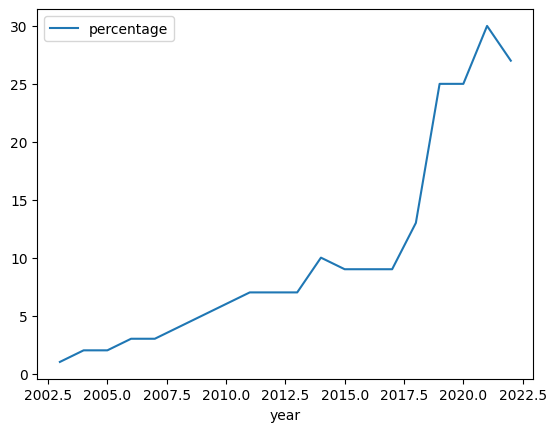

In [22]:
df = pd.read_csv('env_perceptions.csv')
df.columns=["year","percentage"]

df.set_index('year', inplace=True)
df.plot()
print(df)

In [23]:
def adfuller_test(ppm):
    result = adfuller(ppm)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value, label in zip(result,labels):
        print(f'{label}: {value}' )

    print('Stationary' if result[1] <= 0.05 else 'Non-stationary')

adfuller_test(df['percentage'])

ADF Test Statistic: 1.0054821163864738
p-value: 0.994323455785678
#Lags Used: 8
Number of Observations: 11
Non-stationary


In [24]:
df['First Difference'] = df['percentage'] - df['percentage'].shift(1)
df['Seasonal First Difference']=df['percentage']-df['percentage'].shift(12)

df

,percentage,First Difference,Seasonal First Difference
year,,,
2003,1,NaN,NaN
2004,2,1.0,NaN
2005,2,0.0,NaN
2006,3,1.0,NaN
2007,3,0.0,NaN
2008,4,1.0,NaN
2009,5,1.0,NaN
2010,6,1.0,NaN
2011,7,1.0,NaN


In [25]:
adfuller(df['Seasonal First Difference'].dropna().astype('int'))

(-0.8711660782796425,
 0.7973195072370044,
 0,
 7,
 {'1%': -4.9386902332361515,
  '5%': -3.477582857142857,
  '10%': -2.8438679591836733},
 31.73283741238859)

<AxesSubplot:xlabel='year'>

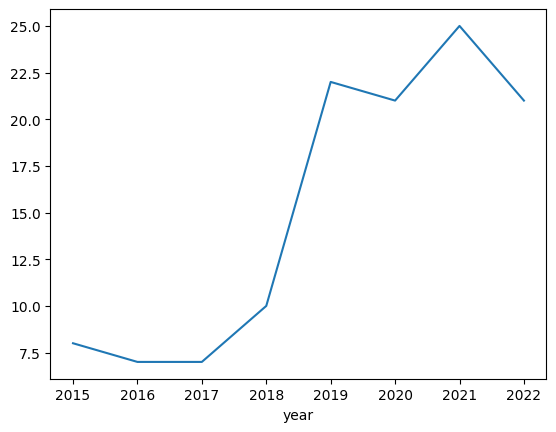

In [26]:
df['Seasonal First Difference'].plot()

C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


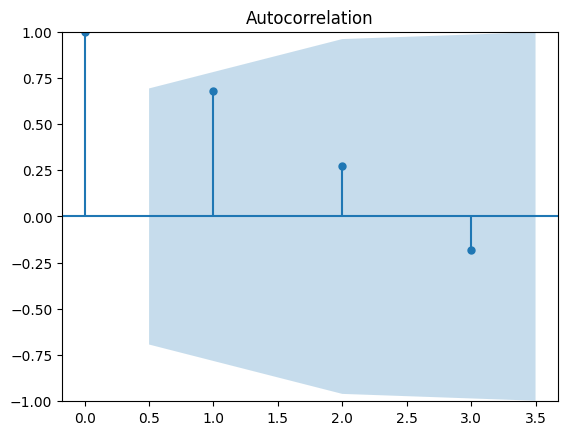

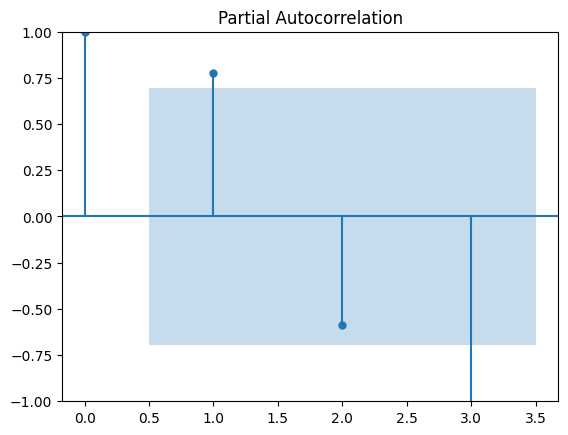

In [29]:
plot_acf(df['Seasonal First Difference'].dropna(), lags=3)
plot_pacf(df['Seasonal First Difference'].dropna(), lags=3)
plt.show()

In [35]:
model = ARIMA(df['percentage'], order=(1,2,1))
model_fit = model.fit()
future_percentages = model_fit.forecast(steps=10).values
print(future_percentages)

[28.89399883 27.8337945  28.55685915 28.20347507 28.49987624 28.4040424
 28.54497648 28.54298847 28.62727365 28.65948107]


C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\krypt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\loca